In [ ]:
# Lauren Escobedo

# This block mount Google Drive to your Colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This block imports necessary Python libraries, such as pandas for data manipulation, and numpy for numerical operations.
# In addition, add the training dataset italy_housing_train.csv
import pandas as pd
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/italy_housing_test.csv")
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/italy_housing_train.csv")

Text(0, 0.5, 'Total Bedrooms')

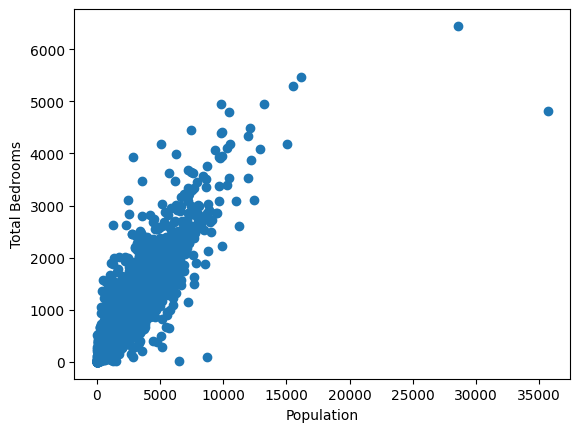

In [ ]:
# This block loads the dataset from a CSV file into a pandas DataFrame, which allows for convenient data manipulation.
# In particular, the code below performs the following tasks:
#     1. It imports the `matplotlib.pyplot` module, which is commonly used for creating static, interactive,
#        and animated visualizations in Python.
# The module is given the alias `plt` for ease of reference.
import matplotlib.pyplot as plt

#     2. It extracts data from two columns, `'population'` and `'total_bedrooms'`, from a DataFrame `df`.
#        The DataFrame `df` is assumed to have been defined in a previous block of code and contain the
#        data from the `italy_housing_train.csv` dataset.
populationData = df['population']
bedroomData = df['total_bedrooms']

#     3. Using `plt.scatter`, it creates a scatter plot with the population values on the x-axis and the total
#        number of bedrooms on the y-axis. Scatter plots are useful for visualizing the relationship
#        between two variables.
plt.scatter(populationData, bedroomData)

#     4. It sets the label for the x-axis to `'Population'` using `plt.xlabel`.
plt.xlabel("Population")

#     5. It sets the label for the y-axis to `'Total Bedrooms'` using `plt.ylabel`.
plt.ylabel("Total Bedrooms")

# When executed, this code will generate a scatter plot that provides a visual representation of how the population
# of a region relates to the total number of bedrooms in that region, according to the dataset provided. This can be
# helpful in understanding the housing characteristics in California, such as whether areas with larger populations
# tend to have more bedrooms available, which could imply larger or more numerous housing units.

In [ ]:
# The code block serves to prepare the data for further processing or analysis, such as input into a machine learning
# model, by ensuring that the data is in the correct format (NumPy arrays) and understanding the dimensions of the
# data (by checking the shape). It's a common step in data preprocessing, especially when the subsequent
# analysis relies on NumPy's efficient computation capabilities. In particular this block convert two Pandas
# to NumPy arrays and then checks their shapes. Here's a breakdown of the code:

#     1. `pop_np = pop.to_numpy()`: This line takes a Pandas Series (`pop`, which refers to the population column)
#     and converts it to a NumPy array. The `.to_numpy()` method is a standard way to convert a Pandas Series to a
#     NumPy array, which can be more efficient for certain types of numerical computations.
pop_np = populationData.to_numpy()

#     2. `bedrooms_np = bedrooms.to_numpy()`: Similar to the first line, this converts another Pandas Series
#     (`bedrooms`, which represent the number of bedrooms in a housing dataset) into a NumPy array.
bedrooms_np = bedroomData.to_numpy()

#     3. `pop_np.shape, bedrooms_np.shape`: This line evaluates the shape of both NumPy arrays created from the Series.
#     The `.shape` attribute of a NumPy array returns a tuple representing the dimensions of the array. If the Series
#     were one-dimensional (which is typical for Series), their shapes would be `(n,)`, where `n` is the
#     number of elements in the Series.
pop_np.shape, bedrooms_np.shape

((17000,), (17000,))

In [ ]:
# This block uses the `LinearRegression` class from the `sklearn.linear_model` module to perform linear regression:

#     1. `from sklearn.linear_model import LinearRegression`: This line imports the `LinearRegression` class from the
#     `scikit-learn` machine learning library. `LinearRegression` is a class that implements linear regression using
#     the least squares approach.
from sklearn.linear_model import LinearRegression

#     2. `sklearn_model = LinearRegression().fit(pop_np.reshape((17000, 1)), bedrooms_np)`: This line creates an instance of
#     `LinearRegression` and fits it to the data. The `fit` method is used to fit the linear model to the data:
#         2.1 - `pop_np.reshape((17000, 1))` suggests that there is a NumPy array named `pop_np` which is being reshaped
#         into a two-dimensional array with 17,000 rows and 1 column. This represents the population feature from the
#         dataset, which is being used as the independent variable or predictor.
#         2.1 - `bedrooms_np` is a NumPy array representing the number of bedrooms in each instance of the dataset, used
#         as the dependent variable or target. The `.fit()` method is what actually trains the linear regression model.
#         The model is trying to find the best linear relationship between the population size
#         (as the independent variable) and the number of bedrooms (as the dependent variable).
sklearn_model = LinearRegression().fit(pop_np.reshape((17000, 1)), bedrooms_np)

#     3. `sklearn_bedroom_predictions = sklearn_model.predict(pop_np.reshape((17000, 1)))`: After fitting the model, this
#     line uses the `.predict()` method to predict the number of bedrooms based on the population feature (`pop_np`).
#     The same reshaping is done here to ensure that the data has the proper dimensions expected by the model.
sklearn_bedroom_predictions = sklearn_model.predict(pop_np.reshape((17000, 1)))

#     4. `sklearn_bedroom_predictions.shape`: This line gets the shape of the `sklearn_bedroom_predictions` array,
#     which contains the predictions made by the model. The shape should return (17000,), indicating there are 17,000
#     predictions made by the model, corresponding to the 17,000 instances in the input data.
sklearn_bedroom_predictions.shape

# In summary, this code block is training a linear regression model to predict the number of bedrooms based on
# the population size and then generating those predictions. The last line checks the shape of the predictions to
# verify that the operation was successful.

(17000,)

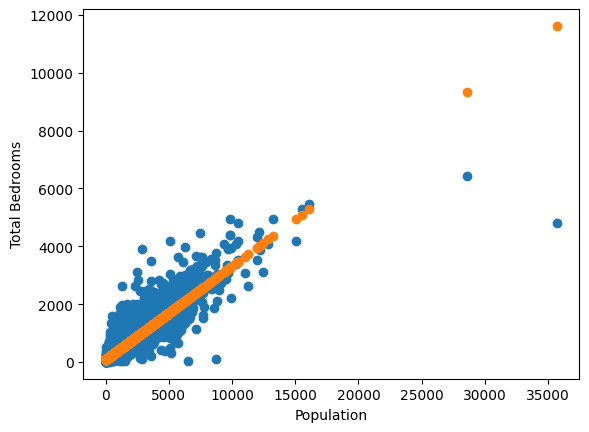

In [ ]:
# This block contains code that is used for plotting data from our DataFrame, which is related to our housing dataset
# given the context of the variable names used. Here's a detailed explanation of the code in the fifth block:
# Similarly to what we have done in block 3:

#     1. `pop = df['population']`: This line is extracting the 'population' column from the DataFrame `df` and assigning
#     it to the variable `pop`.
pop = df['population']

#     2. `bedrooms = df['total_bedrooms']`: Similarly, this line is extracting the 'total_bedrooms' column from the
#     DataFrame `df` and assigning it to the variable `bedrooms`.
bedrooms = df['total_bedrooms']

#     3. `plt.scatter(pop, bedrooms)`: This line creates a scatter plot with `pop` (population) on the x-axis and
#     `bedrooms` (total bedrooms) on the y-axis.
plt.scatter(pop, bedrooms)

#     4. `plt.xlabel('Population')`: This sets the label of the x-axis to 'Population'.
plt.xlabel('Population')

#     5. `plt.ylabel('Total Bedrooms')`: This sets the label of the y-axis to 'Total Bedrooms'.
plt.ylabel('Total Bedrooms')

#     6. Here there is something new! We use `plt.scatter(pop, sklearn_bedroom_predictions)`: this command is plotting
#     the predictions of the number of bedrooms against the population. This scatter plot is used to visualize the
#     performance of the linear regression model. The actual data points show the real number of bedrooms for
#     the corresponding population, and the predictions show what the linear regression model estimates for those same
#     population values. By comparing the two plots, one can visually assess how well the model's predictions align with
#     the actual data.
plt.scatter(pop, sklearn_bedroom_predictions)

# The purpose of this block is to visually compare the actual and predicted values of total bedrooms based on the
# population. It helps in understanding how well the linear regression model, trained in block four, is performing in
# terms of prediction accuracy.

In [ ]:
# This block creates a pandas DataFrame and displaying it. Here's a step-by-step breakdown of the code within this cell:

#     1. A new DataFrame called `predictions_df` is created using `pd.DataFrame()`. This DataFrame is constructed with a
#     dictionary where the keys represent the column names, and the values are the data that will fill those columns.

#     2. Three key-value pairs are provided to the DataFrame constructor:
#         - `'Population'`: The key is a string that will become the column name for the population data. The value `pop`
#         is expected to be a previously defined variable or a list-like object containing the population data.
#         - `'Bedrooms'`: Similarly, this key will create a column for bedroom data, with the `bedrooms` variable holding
#         the actual bedroom data.
#         - `'Sklearn Bedroom Predictions'`: This column is intended to hold predictions about bedrooms made by a machine
#         learning model from the scikit-learn library. The variable `sklearn_bedroom_predictions` is expected to contain
#         these predictions.
predictions_df = pd.DataFrame(pop, bedrooms, sklearn_bedroom_predictions)

#     3. After the DataFrame is created, it is simply returned or printed out in the notebook cell, which would display the
#     DataFrame's contents in tabular form.
print(predictions_df)

# This cell is part of a larger context, likely a machine learning task where a model has been used to predict the number of bedrooms based on population size,
# and the predictions are being organized into a DataFrame for comparison or further analysis.

               405.266668  442.153776  184.591162  243.481106  278.750359   \
total_bedrooms                                                               
1283.0                 NaN         NaN         NaN         NaN         NaN   
1901.0                 NaN         NaN         NaN         NaN         NaN   
174.0                  NaN         NaN         NaN         NaN         NaN   
337.0                  NaN         NaN         NaN         NaN         NaN   
326.0                  NaN         NaN         NaN         NaN         NaN   
...                    ...         ...         ...         ...         ...   
394.0                  NaN         NaN         NaN         NaN         NaN   
528.0                  NaN         NaN         NaN         NaN         NaN   
531.0                  NaN         NaN         NaN         NaN         NaN   
552.0                  NaN         NaN         NaN         NaN         NaN   
300.0                  NaN         NaN         NaN         NaN  

In [14]:
# Import necessary libraries, such as "from sklearn.metrics import mean_squared_error" and "from math import sqrt"
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the test dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/italy_housing_test.csv")

# Assuming that 'population' is the feature and 'bedrooms' is the target in the test set
# as it was in the training set, we will separate them.
X_test = df[['population']]
y_test = df[['total_bedrooms']]

In [15]:
# We use our sklearn_model to load the test set.
sklearn_model.fit(X_test, y_test)

# Make predictions on the test set
predictions = sklearn_model.predict(X_test)

In [16]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, predictions)

# Calculate the RMSE (Root Mean Squared Error) which is a common metric for linear regression.
rsme = sqrt(mse)

print(f'Root mean squared error: {rsme}')

#In particular, RMSE is used to evaluate the linear regression model's performance because it gives a straightforward measure of the average magnitude of the
# model's prediction errors.
#The code calculates RMSE by:
# 1. Predicting the number of bedrooms (`total_bedrooms`) from the population size (`population`) in the Italy housing test dataset.
# 2. Computing the residuals, which are the differences between the predicted number of bedrooms and the actual values in the test dataset.
# 3. Squaring these residuals to ensure they are positive and to emphasize larger errors.
# 4. Averaging the squared residuals, resulting in the Mean Squared Error (MSE).
# 5. Taking the square root of the MSE to obtain the RMSE, which reverts the scale back to the original units of the target variable (bedrooms).
# By using RMSE, the code aims to provide a clear indication of how well the model can predict the number of bedrooms based on population size,
# with a lower RMSE indicating better model performance. The RMSE offers an easily interpretable scale and emphasizes larger prediction errors,
# which can be critical for decision-making in practical applications.
# RMSE should ideally be small relative to the range of the target variable. If the scale of the target variable is 17,000, an RMSE of 214.5807 is approximately 1.26%
# of the scale. This small percentage suggests that the model's predictions are quite close to the actual values on average.
# The RMSE value of 214.5807 means that, on average, the model's predictions of the number of bedrooms are about 214 bedrooms away from the actual number of
# bedrooms in the dataset. In simpler terms, if you think of the model's predictions as arrows trying to hit the center of a target (the real number of bedrooms),
# those arrows are landing, on average, 214 bedrooms away from the bullseye. Since the range of total bedrooms is up to 17,000, being off by 214 is relatively small,
# suggesting the model is doing a decent job at predictions, although there's still some room for error.

Root mean squared error: 214.58071134283995
